In [1]:
# for dataframes
import pandas as pd

from sklearn.model_selection import train_test_split


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib


C:\Users\Amritpal Singh\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [116]:
df=pd.read_csv("C:\\Users\\Amritpal Singh\\Downloads\\HCV-data.csv")
df.head(15)

,Dataset,age,gender,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinine,gamma_glutamyl_transferase,protein
0,hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75
1,hepatitis,23,m,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
2,hepatitis,25,m,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
3,hepatitis,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5
4,hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.60,79.0,37.0,90
5,fibrosis,29,m,41.0,43.1,2.4,83.5,6.0,11.49,5.42,55.2,130.0,66.5
6,hepatitis,30,m,45.0,NaN,66.0,45.0,14.0,12.16,6.10,86.0,43.0,77
7,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
8,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
9,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


In [117]:
df.shape

(615, 13)

In [118]:
df = df.drop_duplicates()
print( df.shape )

(615, 13)


In [119]:
def partition1(x):
    if x == " no_disease":
        return "0"
    elif x == " suspect_disease":
        return "1"
    elif x == " hepatitis":
        return "2"
    elif x == " fibrosis":
        return "3"
    elif x == " cirrhosis":
        return "4"
    
for i in range(len(df)):
    df['Dataset'][i]=partition1(df["Dataset"][i])

In [120]:
df['Dataset'].head(15)

0     2
1     2
2     2
3     2
4     2
5     3
6     2
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Dataset, dtype: object

# Removing Outliers

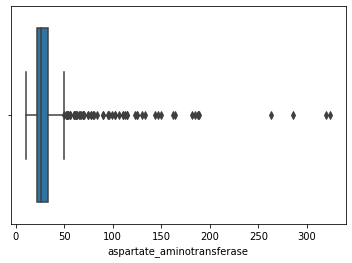

In [121]:
sns.boxplot(df.aspartate_aminotransferase)

In [123]:
df = df[df.aspartate_aminotransferase <=2500 ]
df.shape

(615, 13)

In [124]:
df.head()

,Dataset,age,gender,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinine,gamma_glutamyl_transferase,protein
0,2,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75
1,2,23,m,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
2,2,25,m,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
3,2,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5
4,2,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.60,79.0,37.0,90


In [125]:
df.isnull().values.any()

True

In [126]:
df=df.dropna(how='any')

In [127]:
df.shape

(582, 13)

In [128]:
df.head()

,Dataset,age,gender,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinine,gamma_glutamyl_transferase,protein
1,2,23,m,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
2,2,25,m,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
3,2,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5
5,3,29,m,41.0,43.1,2.4,83.5,6.0,11.49,5.42,55.2,130.0,66.5
7,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69


# Data Preparation

In [135]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [136]:
X = X.drop('gender', axis=1)
X = X.drop('age', axis=1)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [178]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(465, 10) (117, 10) (465,) (117,)


In [179]:
model =RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
y_train_pred = model.predict(X_train)

In [181]:
y_pred = model.predict(X_test)

In [182]:
accuracy_score(y_test, y_pred)

0.9743589743589743

In [183]:
accuracy_score(y_train, y_train_pred)

1.0

In [169]:
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '4', '0',
       '0', '0', '2', '0', '0', '0', '4', '0', '0', '4', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '4',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '4', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype=object)

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from math import sqrt

clf=GaussianNB()
clf.fit(X_train,y_train)
pred1=clf.predict(X_test)
pred2=clf.predict(X_train)
asc1=accuracy_score(y_test,pred1)
asc2=accuracy_score(y_train,pred2)

print(asc1,asc2)

0.9572649572649573 0.9333333333333333


In [203]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

pred1=logreg.predict(X_test)
pred2=logreg.predict(X_train)
asc1=accuracy_score(y_test,pred1)
asc2=accuracy_score(y_train,pred2)

print(asc1,asc2)

0.9658119658119658 0.967741935483871


In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from math import sqrt

clf=MultinomialNB()
clf.fit(X_train,y_train)
pred1=clf.predict(X_test)
pred2=clf.predict(X_train)
asc1=accuracy_score(y_test,pred1)
asc2=accuracy_score(y_train,pred2)

print(asc1,asc2)

0.9572649572649573 0.9247311827956989


In [186]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error
from math import sqrt

clf=BernoulliNB()
clf.fit(X_train,y_train)
pred1=clf.predict(X_test)
pred2=clf.predict(X_train)
asc1=accuracy_score(y_test,pred1)
asc2=accuracy_score(y_train,pred2)

print(asc1,asc2)

0.9316239316239316 0.896774193548387


In [187]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [188]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [189]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [190]:
###### Building the model again with the best hyperparameters
model = SVC(C=1, gamma=1)
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [191]:
y_train_pred = model.predict(X_train)

In [192]:
y_pred = model.predict(X_test)

In [195]:
asc1=accuracy_score(y_test,y_pred)
asc2=accuracy_score(y_train,y_train_pred)

print(asc1,asc2)

0.9316239316239316 1.0
